# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [20]:
df.head(30)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [25]:
years = df["YEAR"].nunique()
print(years)

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [27]:
M_count = (df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].sum())/years
O_count = (df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].sum())/years
if M_count > O_count:
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [29]:
df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].sum()/df["STATE"].nunique()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [31]:
df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [60]:
df['TOTAL_EXPENDITURE_PER_8_GRADER'] = df['TOTAL_EXPENDITURE'] / df['GRADES_8_G']

Feature engineering justification: I made this feature to see how much expenditure the state spend on each 8th grader so I can find a correlation between expenditure per student and 8th grade math score.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

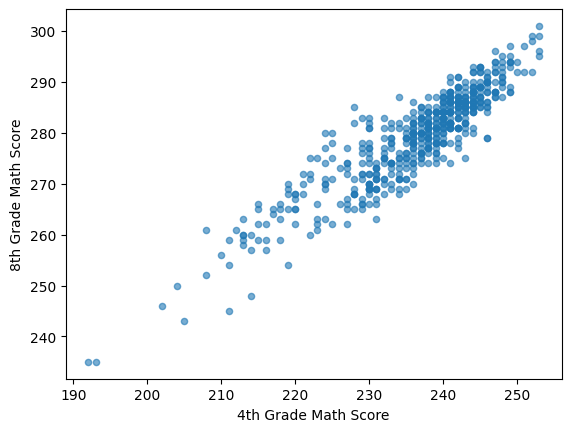

In [39]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

Scatter Plot of 4th Grade Math Score vs. 8th Grade Math Score. 
There seems to be a strong correlation between 4th grade math score and 8th grade math score.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

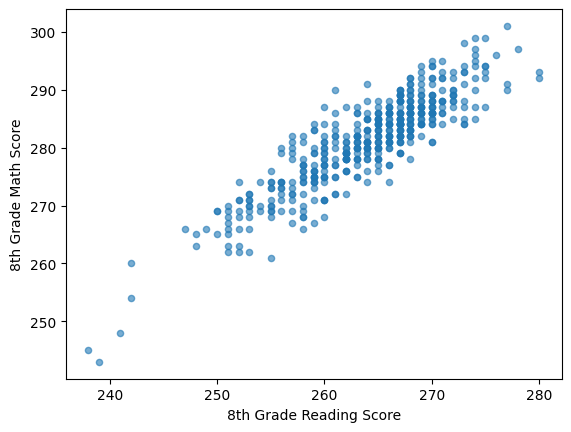

In [44]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

Scatter Plot of Total Expenditure vs. 8th Grade Math Score. 
There seems to be a strong correlation between my 8th grade reading score and 8th grade math score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [42]:
from sklearn.model_selection import train_test_split

In [46]:
# X =
# y =
X = df[['AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=20)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
# create your model here
# model = 
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [54]:
score = model.score(X_test, y_test)
mean_error = np.mean(model.predict(X_test)-y_test)
abs_mean_error = np.mean(np.abs(model.predict(X_test)-y_test))
print(score, mean_error, abs_mean_error)

0.9013867408232795 0.14150476596133288 1.921279275905274


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

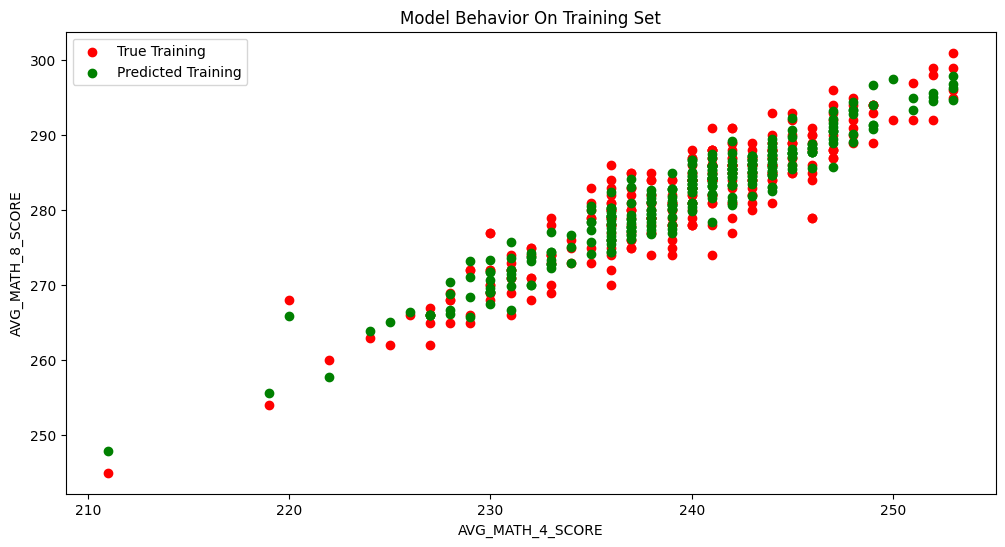

In [57]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

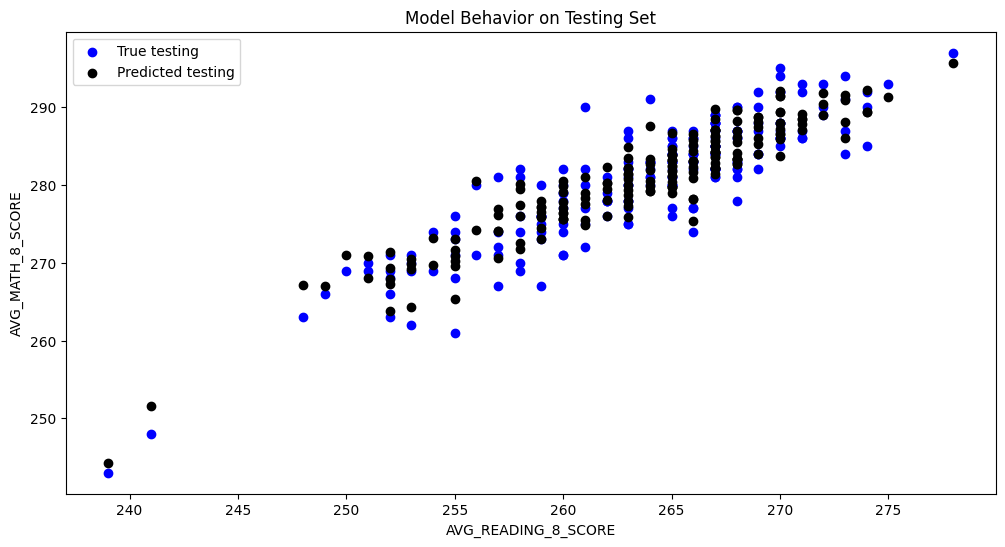

In [59]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

In this checkpoint, I scraped data on the average 8th grade math score through Exploratory Data analysis (EDA). In doing so, I created the "Total Expenditure Per 8th Grader" feature to see how much expenditure the state spend on each 8th grader, so that I can find a correlation between expenditure per 8th grader and 8th grade math score. After creating this feature, I began to investigate the relationship between 8th grade math score and two predictors using visualizations: 4th grade math score and 8th grade reading score. As a result, it was clear that the 4th grade math score and 8th grade reading score were strongly correlated with 8th grade math score. Other variables, like total expenditure of the state, proved to have weak or no correlation with 8th grade math score. Closing off this tutorial, I created a train/test dataset and a linear regression model to find one equation of the form that minimizes error measure. Through this, I was able to train the model with 4th grade math score vs. 8th grade math score and test it on the dataset if 8th grade reading score vs. 8th grade math score. In conclusion, it seemed that my model worked fairly well on the training set, and it also generalized nicely to the testing set.